In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading Data

train = pd.read_csv('data/train.csv')
songs = pd.read_csv('data/songs.csv')
song_labels = pd.read_csv('data/song_labels.csv')
test = pd.read_csv('data/test.csv')
save_for_later = pd.read_csv('data/save_for_later.csv')
dummy_submission = pd.read_csv('data/dummy_submission.csv')

In [3]:
save_for_later.head()

,customer_id,song_id
0,F22180,1140
1,N34498,1523
2,K46875,6918
3,L50176,5828
4,F13830,3039


In [4]:
songs

,song_id,platform_id,released_year,language,number_of_comments
0,8328,T17332564,2013.0,eng,1936
1,8591,T773514,1925.0,eng,420
2,718,U10975,1929.0,eng,5485
3,6593,Y12839,1968.0,NaN,200
4,743,Q28881,2002.0,en-US,10411
...,...,...,...,...,...
9976,2048,X15811568,2013.0,eng,4793
9977,2552,W9597,1952.0,eng,1365
9978,6741,T105574,2006.0,en-US,1296
9979,4564,W13624367,2012.0,eng,1961


In [5]:
song_labels

,platform_id,label_id,count
0,Q207781,10304,6
1,S961833,29011,15
2,X6718608,25148,29
3,Q16134551,8717,774
4,V7126,15169,120
...,...,...,...
999907,P9530,31264,4
999908,V280366,15221,156
999909,R25052,11557,37
999910,R45432,30521,12


In [13]:
new_song_labels = song_labels.groupby("label_id").filter(lambda x: len(x) > 1000)

In [15]:
new_song_labels['platform_id'].value_counts()

P10644930    89
W9460487     86
T15783514    86
P284440      85
Y9361589     84
             ..
T2364284     14
R103902      14
W48697       14
U228765      13
P901680      12
Name: platform_id, Length: 10000, dtype: int64

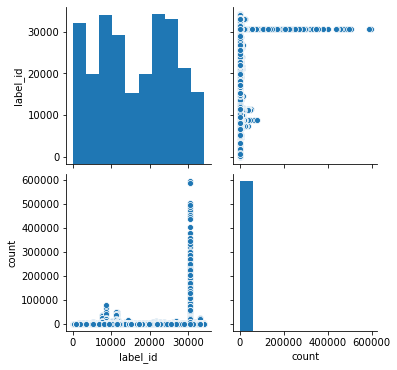

In [19]:
sns.pairplot(song_labels)

In [20]:
song_labels['label_id'].value_counts()

30574    9983
11557    9881
22743    9858
5207     9799
8717     9776
         ... 
364         1
10940       1
4462        1
6511        1
7309        1
Name: label_id, Length: 34252, dtype: int64

In [21]:
label_groups = song_labels.groupby('label_id')

In [29]:
song_labels_new = song_labels.groupby('label_id').sum().sort_values('count', ascending = False)

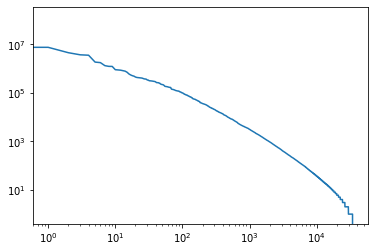

In [45]:
plt.loglog(song_labels_new['count'].to_numpy())

In [46]:
song_labels_new

,count
label_id,
30574,140718761
8717,7507958
11557,4503173
11743,3688819
11305,3548157
...,...
2278,1
7820,1
23158,1


In [47]:
song_labels_new.reset_index(inplace = True)

In [48]:
song_labels_new

,label_id,count
0,30574,140718761
1,8717,7507958
2,11557,4503173
3,11743,3688819
4,11305,3548157
...,...,...
34247,2278,1
34248,7820,1
34249,23158,1
34250,2272,-1


In [53]:
principal_song_labels = song_labels_new['label_id'].to_numpy()[:10]

In [54]:
principal_song_labels

array([30574,  8717, 11557, 11743, 11305, 33114,  7457,  5207, 26138,
       22743], dtype=int64)

In [60]:
label_30574 = song_labels[song_labels['label_id'] == 30574]

In [63]:
label_30574

,platform_id,label_id,count
58,V1098486,30574,16466
94,R17167042,30574,15019
189,T133954,30574,7324
296,X368468,30574,1386
545,Q6472451,30574,41371
...,...,...,...
999408,W30347,30574,8363
999433,V7126,30574,2726
999508,S24213,30574,129449
999841,V12988016,30574,661


In [5]:
train

,customer_id,song_id,score
0,O29219,3459,3
1,I50343,5326,4
2,N42888,236,5
3,F5740,724,4
4,K4115,8452,5
...,...,...,...
710104,H6322,1003,4
710105,L6306,705,5
710106,J2494,6028,3
710107,G41961,2397,4


In [6]:
train['song_id'].value_counts()

1       2863
2       2657
4       2226
3       2175
17      1982
        ... 
9345       4
7803       4
9036       4
8520       4
9486       1
Name: song_id, Length: 10000, dtype: int64

In [7]:
songs

,song_id,platform_id,released_year,language,number_of_comments
0,8328,T17332564,2013.0,eng,1936
1,8591,T773514,1925.0,eng,420
2,718,U10975,1929.0,eng,5485
3,6593,Y12839,1968.0,NaN,200
4,743,Q28881,2002.0,en-US,10411
...,...,...,...,...,...
9976,2048,X15811568,2013.0,eng,4793
9977,2552,W9597,1952.0,eng,1365
9978,6741,T105574,2006.0,en-US,1296
9979,4564,W13624367,2012.0,eng,1961


In [8]:
songs['song_id'].value_counts()

2047    1
9518    1
7481    1
5432    1
9526    1
       ..
8857    1
4759    1
6806    1
661     1
2049    1
Name: song_id, Length: 9981, dtype: int64

In [9]:
save_for_later

,customer_id,song_id
0,F22180,1140
1,N34498,1523
2,K46875,6918
3,L50176,5828
4,F13830,3039
...,...,...
238875,J52814,5662
238876,G35381,1216
238877,L716,4581
238878,I15343,16
